In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("D:\\Uni-ka-Barood\\creditcard.csv\\creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
zeros=df['Class'].value_counts().get(0,0)
ones=df['Class'].value_counts().get(1,0)
print(' zeros: ',zeros,' ones: ',ones)

 zeros:  284315  ones:  492


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df2=df.copy()
df2.drop_duplicates(subset=None,inplace=True)
df2.shape

(283726, 31)

In [10]:
df.shape

(284807, 31)

In [11]:
df=df2

In [12]:
del df2

In [13]:
zeros=df['Class'].value_counts().get(0,0)
ones=df['Class'].value_counts().get(1,0)
print(' zeros: ',zeros,' ones: ',ones)

 zeros:  283253  ones:  473


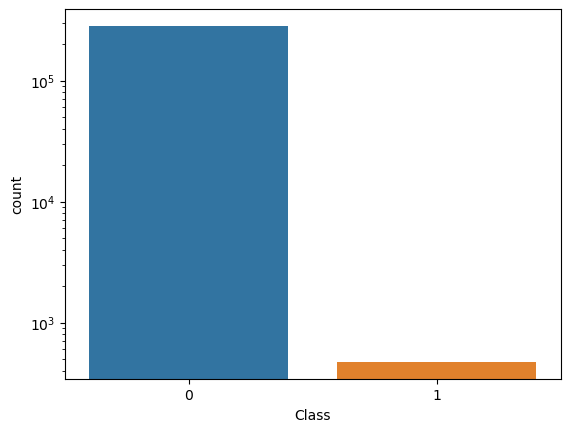

In [14]:
import seaborn as sns
ax=sns.countplot(x='Class',data=df)
ax.set_yscale('log')

In [32]:
a=df[df['Class']==0].head(473)
b=df[df['Class']==1]
c=pd.concat([a,b])
c.shape

(946, 31)

In [33]:
c.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [34]:
x=c[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y=c['Class']

In [18]:
import matplotlib.pyplot as plt

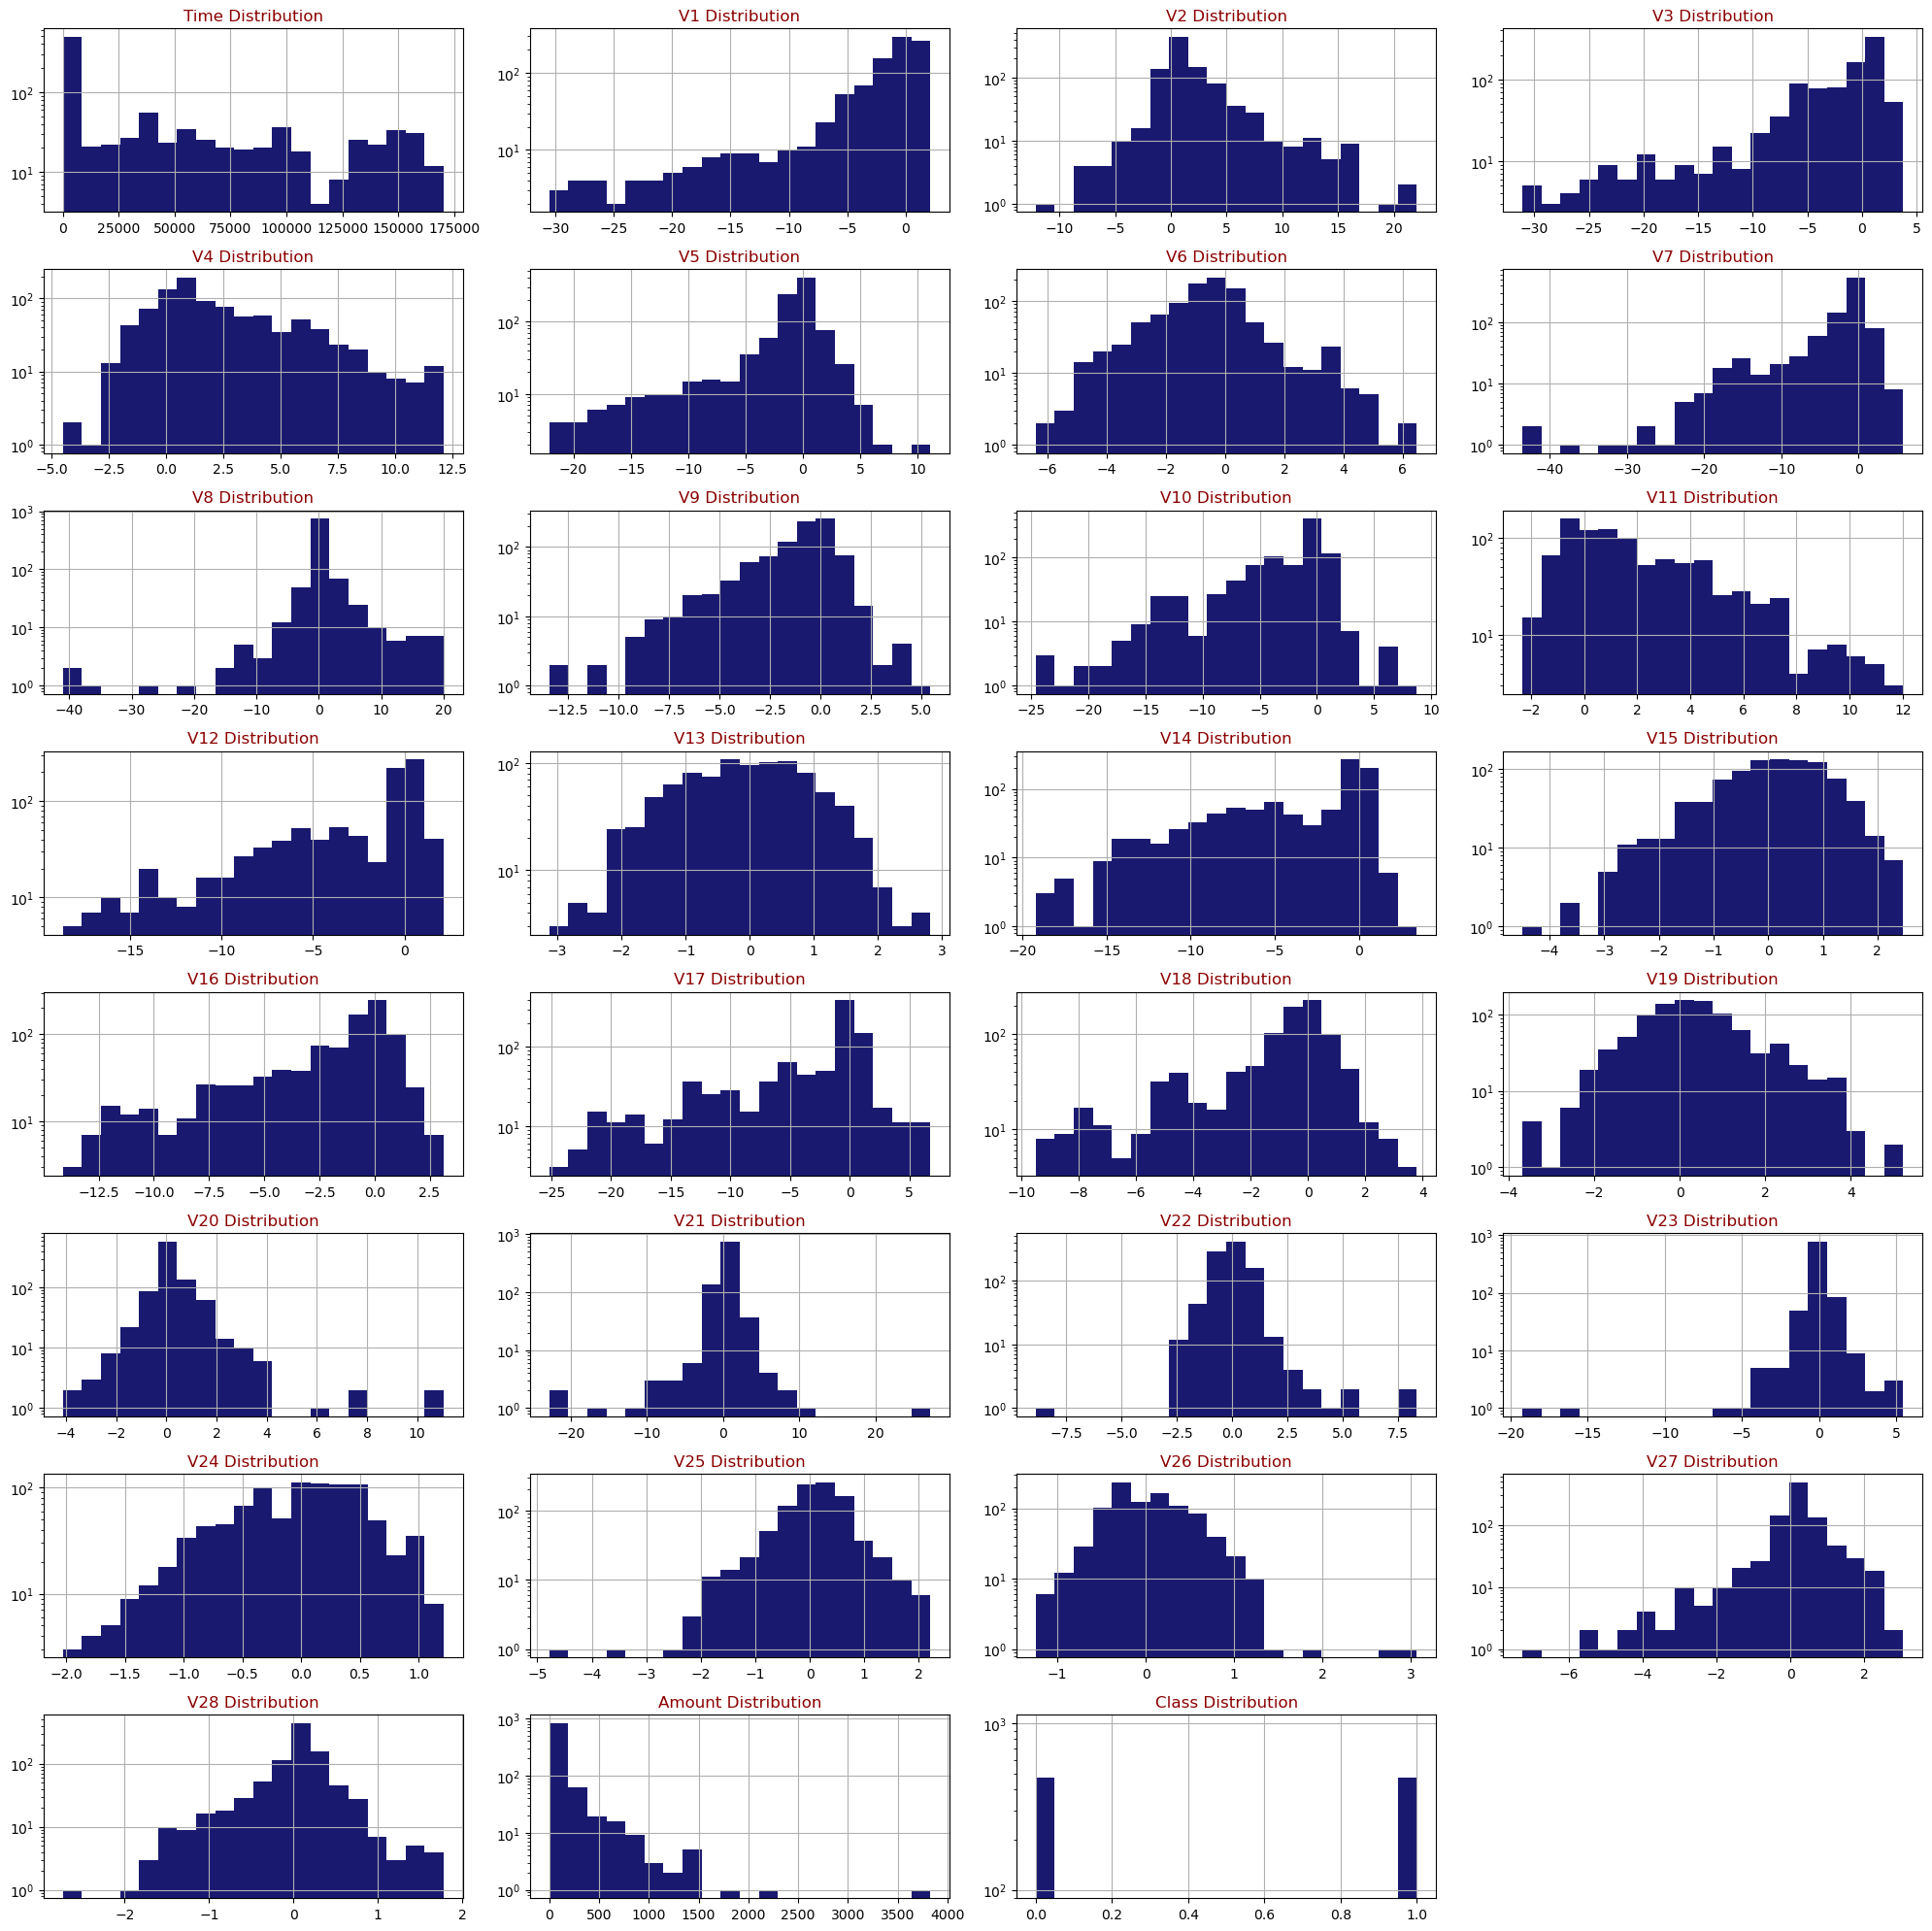

In [35]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(c,c.columns,8,4)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=42)

In [37]:
lr=LogisticRegression()     

In [38]:
lr.fit(x_train,y_train)

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scalar=StandardScaler()

In [43]:
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)


In [45]:
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [47]:
x_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
64411,-10.527304,7.639745,-13.443115,4.303403,-8.048210,-3.466997,-8.643193,7.284105,-2.362097,-5.996596,...,0.847085,0.937416,-0.931178,-0.235697,-0.031393,0.591558,-0.263516,1.108897,0.219021,99.99
199896,-1.212682,-2.484824,-6.397186,3.670562,-0.863375,-1.855855,1.017732,-0.544704,-1.703378,-3.739659,...,2.908374,1.396872,0.092073,-1.492882,-0.204227,0.532511,-0.293871,0.212663,0.431095,1335.00
17366,-28.524268,15.876923,-29.468732,6.447591,-20.786000,-4.865613,-19.501084,18.748872,-3.642990,-7.939642,...,1.706889,1.805770,-2.119376,-1.317450,0.169846,2.051687,-0.210502,1.301734,0.380246,99.99
149145,-2.405580,3.738235,-2.317843,1.367442,0.394001,1.919938,-3.106942,-10.764403,3.353525,0.369936,...,-2.140874,10.005998,-2.454964,1.684957,0.118263,-1.531380,-0.695308,-0.152502,-0.138866,6.99
6717,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,-3.796354,-7.454841,...,0.576656,0.615642,-0.406427,-0.737018,-0.279642,1.106766,0.323885,0.894767,0.569519,1.00


In [54]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_train_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.718577,1.733391,-1.790997,0.633104,-1.755029,-1.689420,-1.171771,1.606252,-0.493497,-0.738958,...,0.565723,0.236477,-0.836429,-0.246789,0.100819,0.819526,-0.623996,1.229656,0.457879,-0.044038
1,0.205522,-1.281422,-0.578184,0.413296,0.142268,-0.734845,0.654137,-0.203078,-0.189515,-0.205759,...,2.469304,0.426663,0.144272,-1.780555,-0.187038,0.726101,-0.690807,0.150779,0.984006,3.914701
2,-5.436165,4.186192,-4.549478,1.377859,-5.118692,-2.518077,-3.223905,4.255896,-1.084595,-1.198001,...,1.359744,0.595921,-1.975218,-1.566527,0.435984,3.129751,-0.507311,1.461791,0.857858,-0.044038
3,-0.040892,0.571631,0.123991,-0.386662,0.474303,1.502250,-0.125424,-2.564972,2.144113,0.765130,...,-2.193630,3.990299,-2.296851,2.096406,0.350073,-2.539399,-1.574376,-0.288802,-0.429992,-0.342143
4,0.081458,0.922887,-0.497102,1.118714,0.688302,-1.433550,0.137954,0.052522,-1.155369,-1.083467,...,0.315984,0.103282,-0.333499,-0.858401,-0.312642,1.634691,0.668885,0.971888,1.327418,-0.361344


In [55]:
predict=lr.predict(x_test)

d:\Anaconda\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [57]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.60      0.01      0.02       342
           1       0.48      0.99      0.65       321

    accuracy                           0.49       663
   macro avg       0.54      0.50      0.33       663
weighted avg       0.54      0.49      0.32       663



In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Pred No','Pred Yes'],index=['Actual No','Actual yes'])

,Pred No,Pred Yes
Actual No,3,339
Actual yes,2,319


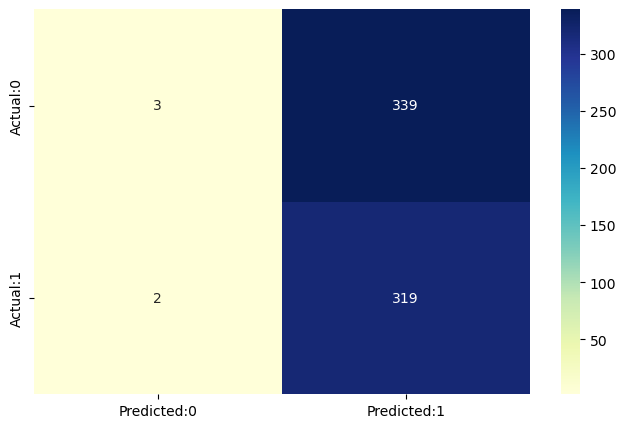

In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [65]:
#giving full dataset
x=df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y=df['Class']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=42)

x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

lr.fit(x_train_scaled,y_train)

predict=lr.predict(x_test)

print(classification_report(y_test,predict))

d:\Anaconda\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.65      0.79    198280
           1       0.00      0.84      0.01       329

    accuracy                           0.65    198609
   macro avg       0.50      0.75      0.40    198609
weighted avg       1.00      0.65      0.79    198609



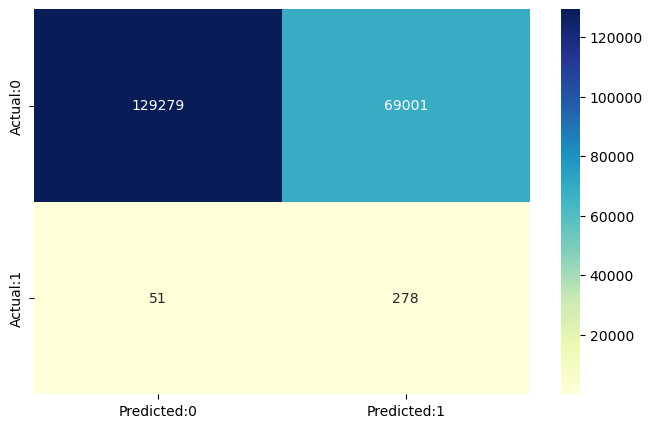

In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");